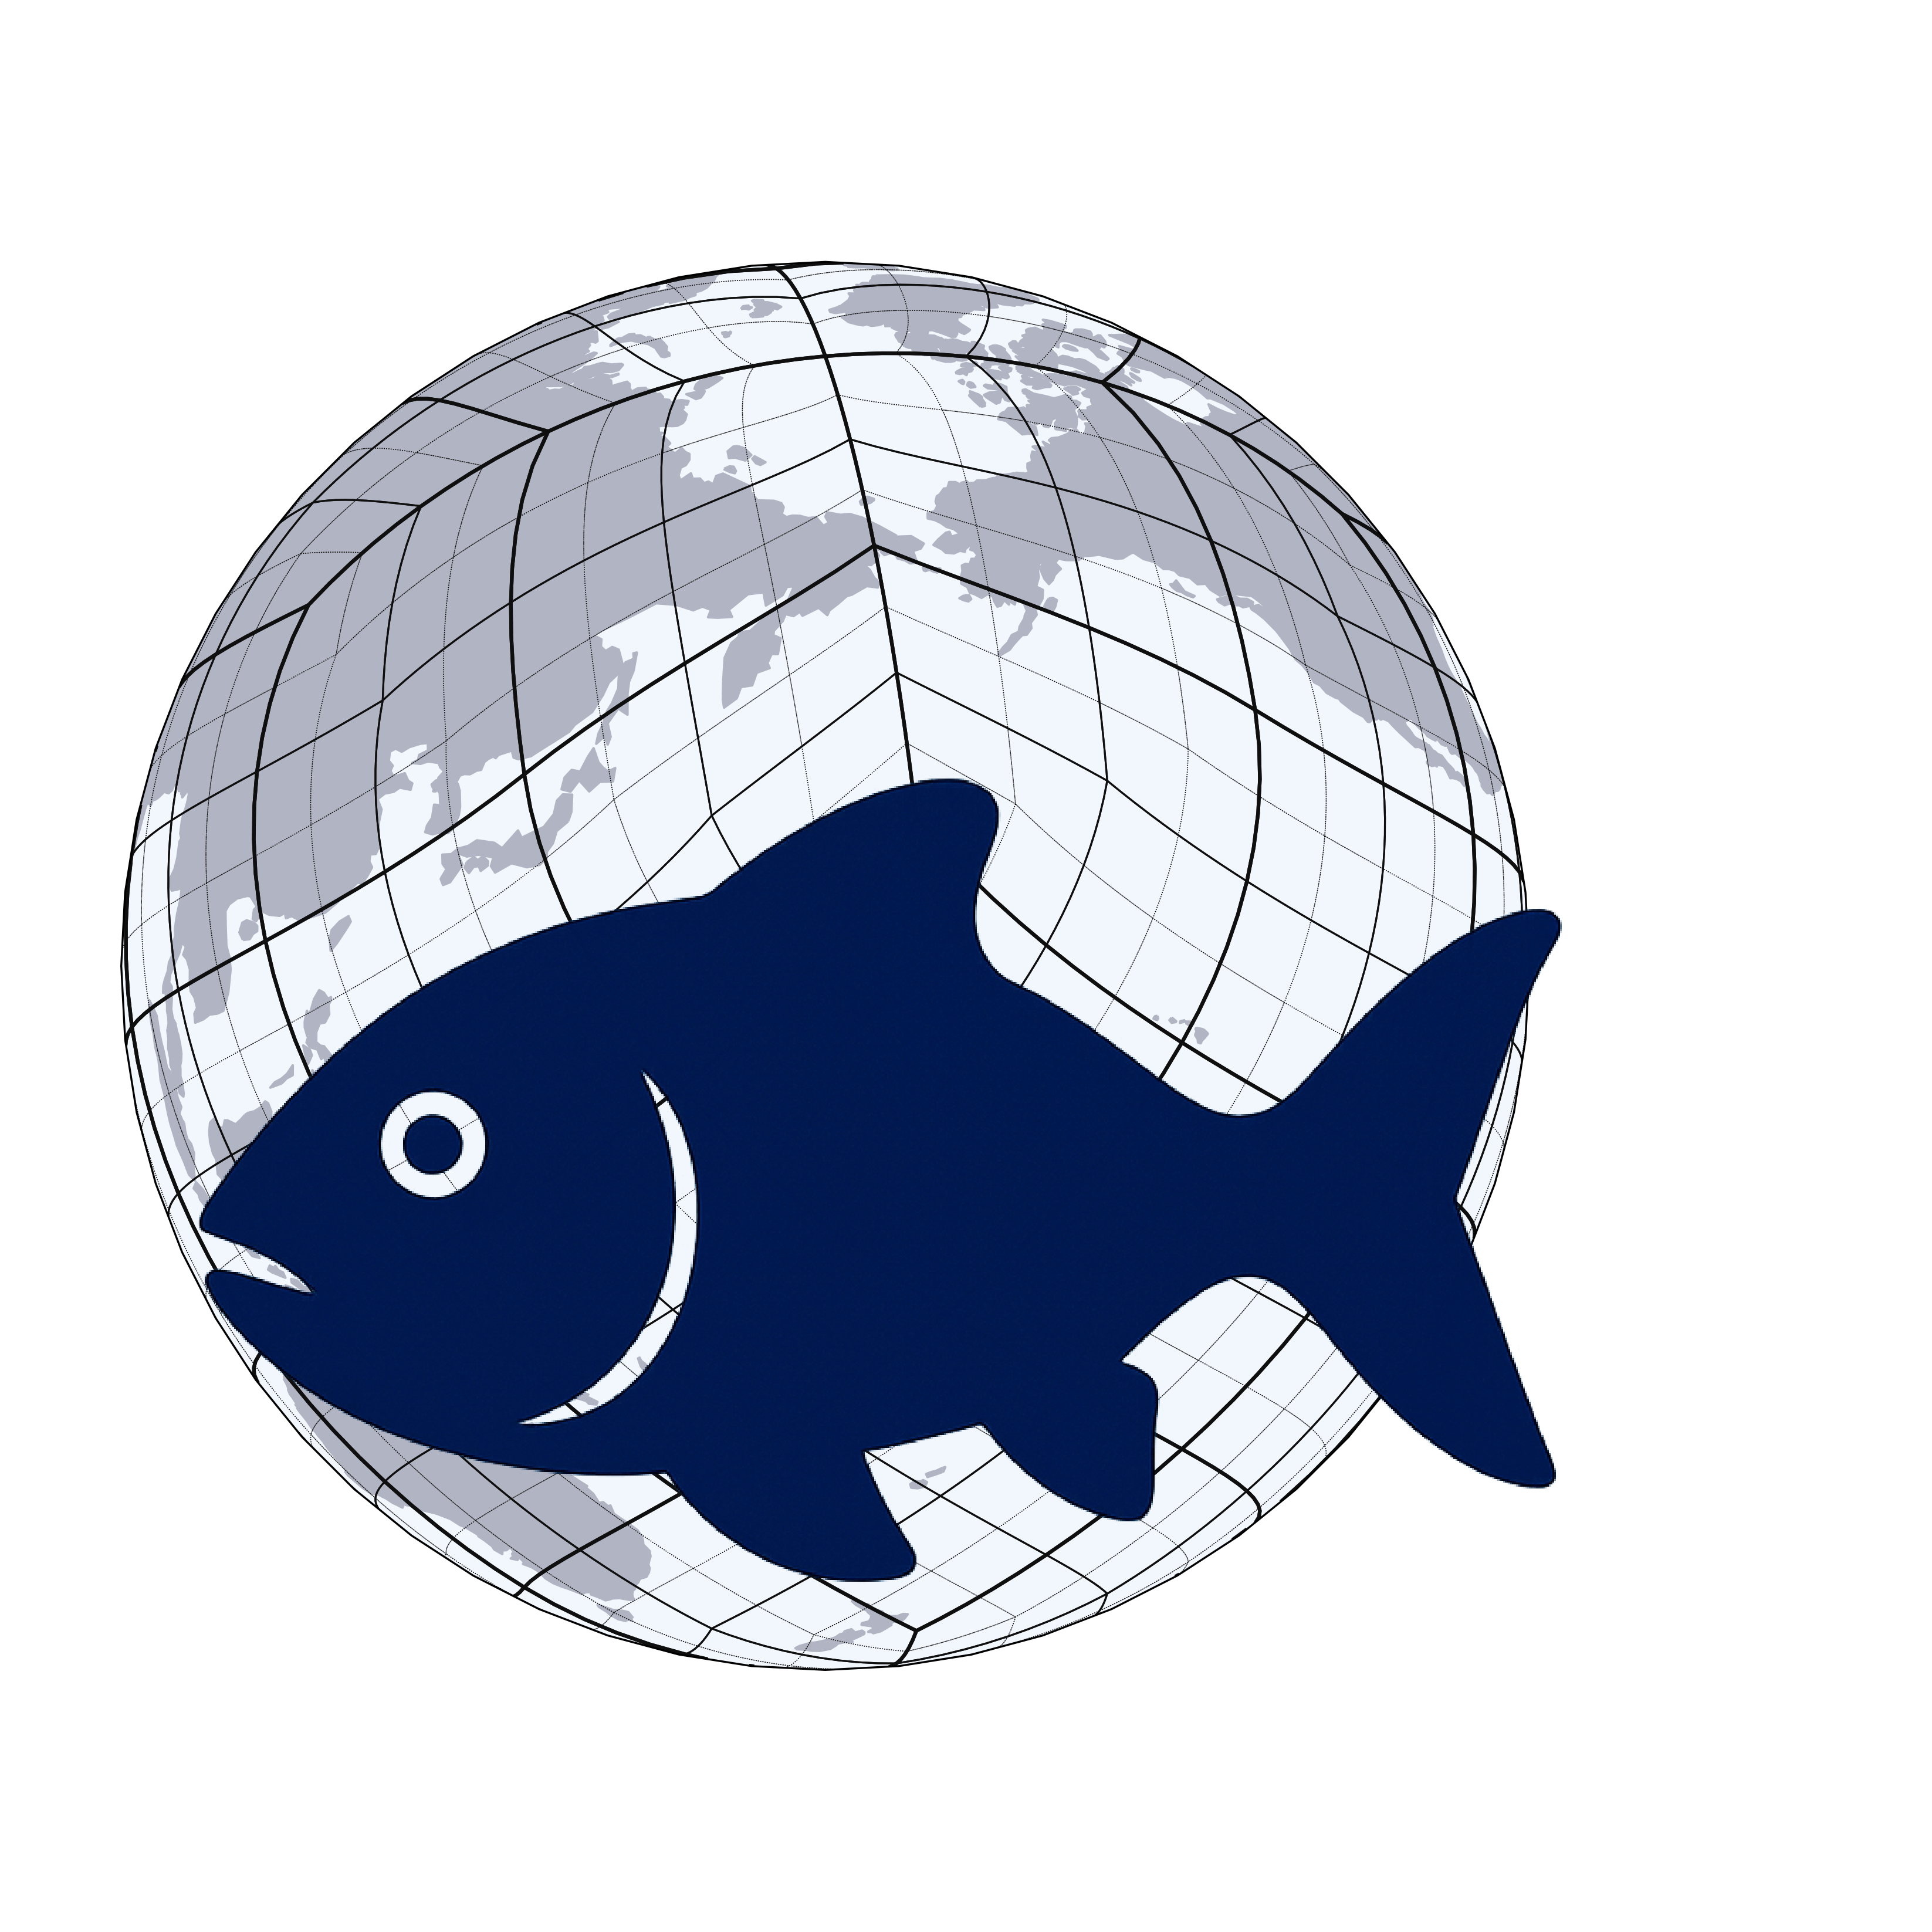

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import healpy as hp
import numpy as np
import matplotlib.patheffects as path_effects
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Function to plot HEALPix grid
def plot_healpix_grid(ax, level, color='black', linewidth=0.5, linestyle='-'):
    """Plot HEALPix grid lines for a given level (NSIDE = 2**level)."""
    nside = 2**level
    npix = hp.nside2npix(nside)
    for pix in range(npix):
        boundary = hp.boundaries(nside, pix, step=10)
        lon, lat = hp.vec2ang(boundary.T, lonlat=True)
        lon = np.append(lon, lon[0])
        lat = np.append(lat, lat[0])
        ax.plot(lon, lat, transform=ccrs.Geodetic(),
                color=color, linewidth=linewidth, linestyle=linestyle)

# === Figure setup ===
fig = plt.figure(figsize=(8, 8), dpi=300)
fig.patch.set_alpha(0.0)

projection = ccrs.Orthographic(central_longitude=170, central_latitude=30)
ax = plt.axes([0, 0, 1, 1], projection=projection)
ax.set_global()
ax.patch.set_alpha(0.0)

# === Color configuration ===
land_color = '#B1B5C3'        # Light grey tone for land
ocean_color = '#F2F7FD'       # Soft neutral for ocean
grid_color = '#100F0F'        # Deep grey for grid lines
text_color = '#2F3842'        # DestinE dark blue/grey tone

# === Map features ===
ax.add_feature(cfeature.LAND, facecolor=land_color)
ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)
ax.coastlines(resolution='110m', color=land_color)

# === HEALPix Grids ===
plot_healpix_grid(ax, level=1, color=grid_color, linewidth=1.5, linestyle='-')
plot_healpix_grid(ax, level=2, color=grid_color, linewidth=0.75, linestyle='-')
plot_healpix_grid(ax, level=3, color=grid_color, linewidth=0.35, linestyle=':')

# === Add fish image ===
img = mpimg.imread("fish.png")
imagebox = OffsetImage(img, zoom=0.75)
ab = AnnotationBbox(imagebox, (0.60, 0.50), frameon=False, xycoords='figure fraction')
fig.add_artist(ab)

# === Save ===
plt.savefig("logo.png", transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close()